## Creare un sistema di classi per algoritmi di machine learning

sviluppa step by step un sistema di classi per mostrare come applicare i concetti OOP a un caso pratico di classificazione.


### Step1: Creare una classe base per tutti i classificatori
Iniziamo con una classe base che definirà l'interfaccia comune a tutti i classificatori:
-  "\__init__\"
- fit
- predict
- score


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class Classificatore:
    """Classe base per tutti gli algoritmi di classificazione"""
    
    def __init__(self):
        self.è_addestrato = False
        self.nome = "Classificatore Base"
    
    def fit(self, X, y):
        """Addestra il classificatore sui dati"""
        # Questo è un metodo che verrà implementato nelle classi derivate
        raise NotImplementedError("Le classi derivate devono implementare il metodo fit")

### Step2: Implementare un classificatore con la prediction e lo score

In [2]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class Classificatore:
    """Classe base per tutti gli algoritmi di classificazione"""
    
    def __init__(self):
        self.è_addestrato = False
        self.nome = "Classificatore Base"
    
    def fit(self, X, y):
        """Addestra il classificatore sui dati"""
        # Questo è un metodo che verrà implementato nelle classi derivate
        raise NotImplementedError("Le classi derivate devono implementare il metodo fit")
    
    def predict(self, X):
        """Predice le classi per i dati forniti"""
        # Questo è un metodo che verrà implementato nelle classi derivate
        raise NotImplementedError("Le classi derivate devono implementare il metodo predict")
    
    def score(self, X, y):
        """Calcola l'accuratezza del modello"""
        if not self.è_addestrato:
            raise ValueError("Il modello deve essere addestrato prima di calcolare lo score")
        y_pred = self.predict(X)
        
        return accuracy_score(y, y_pred)

### Step3: Implementare un altro classificatore
Aggiungiamo una classe per un classificatore k-NN (k Nearest Neighbors) semplificato:


In [3]:
from sklearn.neighbors import KNeighborsClassifier

class ClassificatoreKNN(Classificatore):
    """Classificatore basato su k-nearest neighbors"""
    
    def __init__(self, k=3):
        super().__init__()
        self.nome = f"KNN (k={k})"
        self.k = k
        self.modello = KNeighborsClassifier(n_neighbors=k)
    
    def fit(self, X, y):
        """Addestra il classificatore k-NN sui dati"""
        self.modello.fit(X, y)
        self.è_addestrato = True
        return self
    
    def predict(self, X):
        """Predice le classi usando k-NN"""
        if not self.è_addestrato:
            raise ValueError("Il modello deve essere addestrato prima di fare predizioni")
        
        return self.modello.predict(X)

### Step4: Aggiungere il metodo classification_report
Ora aggiungiamo il metodo per generare il classification report alla classe base:


In [4]:
class Classificatore:
    """Classe base per tutti gli algoritmi di classificazione"""
    
    def __init__(self):
        self.è_addestrato = False
        self.nome = "Classificatore Base"
    
    def fit(self, X, y):
        """Addestra il classificatore sui dati"""
        # Questo è un metodo che verrà implementato nelle classi derivate
        raise NotImplementedError("Le classi derivate devono implementare il metodo fit")
    
    def predict(self, X):
        """Predice le classi per i dati forniti"""
        # Questo è un metodo che verrà implementato nelle classi derivate
        raise NotImplementedError("Le classi derivate devono implementare il metodo predict")
    
    def score(self, X, y):
        """Calcola l'accuratezza del modello"""
        if not self.è_addestrato:
            raise ValueError("Il modello deve essere addestrato prima di calcolare lo score")
        
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

    def report_classificazione(self, X, y):
        """Genera un report dettagliato sulla classificazione"""
        if not self.è_addestrato:
            raise ValueError("Il modello deve essere addestrato prima di generare il report")
        
        y_pred = self.predict(X)
        report = classification_report(y, y_pred)
        print(f"Report di classificazione per {self.nome}:")
        print(report)
        return report

### Step5: Aggiungere il metodo confusion_matrix
Aggiungiamo ora il metodo per visualizzare la matrice di confusione anche per KNN


In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

class Classificatore:
    """Classe base per tutti gli algoritmi di classificazione"""
    
    def __init__(self):
        self.è_addestrato = False
        self.nome = "Classificatore Base"
    
    def fit(self, X, y):
        """Addestra il classificatore sui dati"""
        # Questo è un metodo che verrà implementato nelle classi derivate
        raise NotImplementedError("Le classi derivate devono implementare il metodo fit")
    
    def predict(self, X):
        """Predice le classi per i dati forniti"""
        # Questo è un metodo che verrà implementato nelle classi derivate
        raise NotImplementedError("Le classi derivate devono implementare il metodo predict")
    
    def score(self, X, y):
        """Calcola l'accuratezza del modello"""
        if not self.è_addestrato:
            raise ValueError("Il modello deve essere addestrato prima di calcolare lo score")
        
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)
    
    def report_classificazione(self, X, y):
        """Genera un report dettagliato sulla classificazione"""
        if not self.è_addestrato:
            raise ValueError("Il modello deve essere addestrato prima di generare il report")
        
        y_pred = self.predict(X)
        report = classification_report(y, y_pred)
        print(f"Report di classificazione per {self.nome}:")
        print(report)
        return report
    
    def matrice_confusione(self, X, y, etichette=None):
        """Visualizza la matrice di confusione"""
        if not self.è_addestrato:
            raise ValueError("Il modello deve essere addestrato prima di visualizzare la matrice di confusione")
        
        y_pred = self.predict(X)
        cm = confusion_matrix(y, y_pred)
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=etichette, yticklabels=etichette)
        plt.xlabel('Predizioni')
        plt.ylabel('Valori reali')
        plt.title(f'Matrice di confusione - {self.nome}')
        plt.tight_layout()
        plt.show()
        
        return cm

In [6]:
class ClassificatoreKNN(Classificatore):
    """Classificatore basato su k-nearest neighbors"""
    
    def __init__(self, k=3):
        super().__init__()
        self.nome = f"KNN (k={k})"
        self.k = k
        self.modello = KNeighborsClassifier(n_neighbors=k)
    
    def fit(self, X, y):
        """Addestra il classificatore k-NN sui dati"""
        self.modello.fit(X, y)
        self.è_addestrato = True
        return self
    
    def predict(self, X):
        """Predice le classi usando k-NN"""
        if not self.è_addestrato:
            raise ValueError("Il modello deve essere addestrato prima di fare predizioni")
        
        return self.modello.predict(X)
    
    # Aggiungiamo i metodi mancanti
    def report_classificazione(self, X, y):
        """Genera un report dettagliato sulla classificazione"""
        if not self.è_addestrato:
            raise ValueError("Il modello deve essere addestrato prima di generare il report")
        
        y_pred = self.predict(X)
        report = classification_report(y, y_pred)
        print(f"Report di classificazione per {self.nome}:")
        print(report)
        return report
    
    def matrice_confusione(self, X, y, etichette=None):
        """Visualizza la matrice di confusione"""
        if not self.è_addestrato:
            raise ValueError("Il modello deve essere addestrato prima di visualizzare la matrice di confusione")
        
        y_pred = self.predict(X)
        cm = confusion_matrix(y, y_pred)
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=etichette, yticklabels=etichette)
        plt.xlabel('Predizioni')
        plt.ylabel('Valori reali')
        plt.title(f'Matrice di confusione - {self.nome}')
        plt.tight_layout()
        plt.show()
        
        return cm

### Step 6: Creare una classe per un classificatore più complesso
Implementiamo una classe per un classificatore basato su alberi decisionali:


In [7]:
from sklearn.tree import DecisionTreeClassifier

class ClassificatoreAlberoDecisionale(Classificatore):
    """Classificatore basato su alberi decisionali"""
    
    def __init__(self, max_depth=None):
        super().__init__()
        self.max_depth = max_depth
        self.nome = f"Albero Decisionale (profondità={max_depth})"
        self.modello = DecisionTreeClassifier(max_depth=max_depth)
    
    def fit(self, X, y):
        """Addestra l'albero decisionale sui dati"""
        self.modello.fit(X, y)
        self.è_addestrato = True
        return self
    
    def predict(self, X):
        """Predice le classi usando l'albero decisionale"""
        if not self.è_addestrato:
            raise ValueError("Il modello deve essere addestrato prima di fare predizioni")
        
        return self.modello.predict(X)
    
    def importanza_feature(self):
        """Restituisce l'importanza delle feature"""
        if not self.è_addestrato:
            raise ValueError("Il modello deve essere addestrato prima di calcolare l'importanza delle feature")
        
        return self.modello.feature_importances_

### Step7: Aggiungere le classi mancanti per SVM e Random Forest


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

class ClassificatoreSVM(Classificatore):
    """Classificatore basato su Support Vector Machine"""
    
    def __init__(self, C=1.0, kernel='rbf'):
        super().__init__()
        self.C = C
        self.kernel = kernel
        self.nome = f"SVM (C={C}, kernel={kernel})"
        self.modello = SVC(C=C, kernel=kernel)
    
    def fit(self, X, y):
        """Addestra l'SVM sui dati"""
        self.modello.fit(X, y)
        self.è_addestrato = True
        return self
    
    def predict(self, X):
        """Predice le classi usando SVM"""
        if not self.è_addestrato:
            raise ValueError("Il modello deve essere addestrato prima di fare predizioni")
        
        return self.modello.predict(X)

class ClassificatoreRandomForest(Classificatore):
    """Classificatore basato su Random Forest"""
    
    def __init__(self, n_estimators=100, max_depth=None):
        super().__init__()
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.nome = f"Random Forest (n_estimators={n_estimators}, max_depth={max_depth})"
        self.modello = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    
    def fit(self, X, y):
        """Addestra il Random Forest sui dati"""
        self.modello.fit(X, y)
        self.è_addestrato = True
        return self
    
    def predict(self, X):
        """Predice le classi usando Random Forest"""
        if not self.è_addestrato:
            raise ValueError("Il modello deve essere addestrato prima di fare predizioni")
        
        return self.modello.predict(X)
    
    def importanza_feature(self):
        """Restituisce l'importanza delle feature"""
        if not self.è_addestrato:
            raise ValueError("Il modello deve essere addestrato prima di calcolare l'importanza delle feature")
        
        return self.modello.feature_importances_

### Step8: Creazione di una "factory" di classificatori
Possiamo creare una classe factory per generare facilmente diversi tipi di classificatori:


In [10]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

class FactoryClassificatori:
    """Factory per creare diverse istanze di classificatori"""
    
    @staticmethod
    def crea_classificatore(tipo, **kwargs):
        """Crea e restituisce un classificatore del tipo specificato"""
        if tipo.lower() == 'knn':
            k = kwargs.get('k', 3)
            return ClassificatoreKNN(k=k)
        elif tipo.lower() == 'albero':
            max_depth = kwargs.get('max_depth', None)
            return ClassificatoreAlberoDecisionale(max_depth=max_depth)
        elif tipo.lower() == 'svm':
            C = kwargs.get('C', 1.0)
            kernel = kwargs.get('kernel', 'rbf')
            return ClassificatoreSVM(C=C, kernel=kernel)
        elif tipo.lower() == 'random_forest':
            n_estimators = kwargs.get('n_estimators', 100)
            max_depth = kwargs.get('max_depth', None)
            return ClassificatoreRandomForest(n_estimators=n_estimators, max_depth=max_depth)
        else:
            raise ValueError(f"Tipo di classificatore '{tipo}' non supportato")

### Step 9: Creazione di una classe per la valutazione e confronto dei modelli


In [11]:
class ValutatoreModelli:
    """Classe per valutare e confrontare diversi modelli di classificazione"""
    
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.modelli = []
    
    def aggiungi_modello(self, modello):
        """Aggiunge un modello alla lista dei modelli da valutare"""
        self.modelli.append(modello)
        return self
    
    def valuta_tutti(self):
        """Addestra e valuta tutti i modelli"""
        risultati = {}
        
        for modello in self.modelli:
            # Addestra il modello
            modello.fit(self.X_train, self.y_train)
            
            # Calcola l'accuratezza
            accuratezza = modello.score(self.X_test, self.y_test)
            
            # Aggiungi i risultati al dizionario
            risultati[modello.nome] = accuratezza
            
            print(f"Modello: {modello.nome} - Accuratezza: {accuratezza:.4f}")
        
        return risultati
    
    def confronta_graficamente(self):
        """Confronta graficamente le performance dei modelli"""
        risultati = self.valuta_tutti()
        
        # Crea il grafico
        plt.figure(figsize=(10, 6))
        plt.bar(risultati.keys(), risultati.values(), color='skyblue')
        plt.xlabel('Modello')
        plt.ylabel('Accuratezza')
        plt.title('Confronto delle accuratezze dei modelli')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        return risultati

### Step10: Esempio di utilizzo completo
Ecco un esempio di come utilizzare il sistema di classi che abbiamo creato:


In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X = iris.data
y = iris.target
nomi_classi = iris.target_names

# Divisione in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=667,
                                                    stratify=y,
                                                    )

Modello: KNN (k=5) - Accuratezza: 0.9556
Modello: SVM (C=1.0, kernel=linear) - Accuratezza: 0.9556
Modello: Albero Decisionale (profondità=3) - Accuratezza: 0.9556
Modello: Random Forest (n_estimators=100, max_depth=5) - Accuratezza: 0.9333


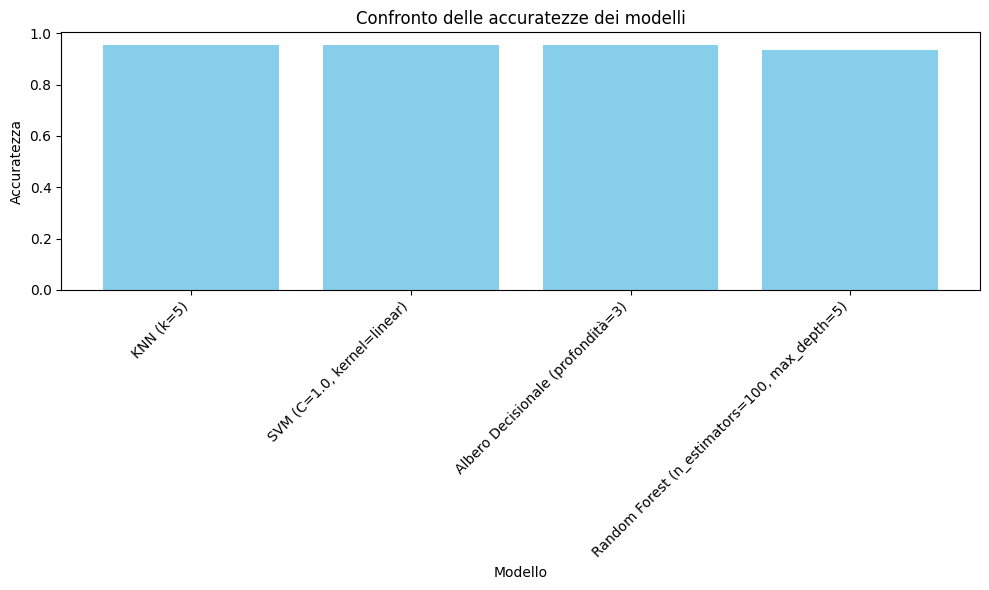


Il miglior modello è: KNN (k=5)

Report di classificazione per il miglior modello:
Report di classificazione per KNN (k=5):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45


Matrice di confusione per il miglior modello:


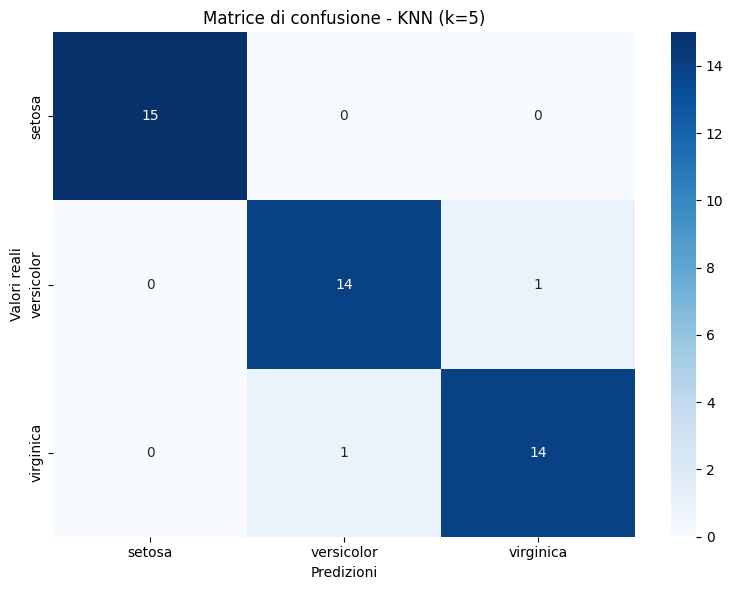

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

In [15]:
# Creazione del valutatore
valutatore = ValutatoreModelli(X_train, y_train, X_test, y_test)

# Creazione di diversi modelli usando la factory
factory = FactoryClassificatori()
knn = factory.crea_classificatore('knn', k=5)
svm = factory.crea_classificatore('svm', C=1.0, kernel='linear')
dt = factory.crea_classificatore('albero', max_depth=3)
rf = factory.crea_classificatore('random_forest', n_estimators=100, max_depth=5)

# Aggiunta dei modelli al valutatore
valutatore.aggiungi_modello(knn)
valutatore.aggiungi_modello(svm)
valutatore.aggiungi_modello(dt)
valutatore.aggiungi_modello(rf)

# Confronto grafico delle performance
risultati = valutatore.confronta_graficamente()

# Analisi dettagliata del modello migliore
miglior_modello_nome = max(risultati, key=risultati.get)
print(f"\nIl miglior modello è: {miglior_modello_nome}")

# Troviamo il miglior modello tra quelli aggiunti
miglior_modello = None
for modello in valutatore.modelli:
    if modello.nome == miglior_modello_nome:
        miglior_modello = modello
        break

# Report di classificazione per il miglior modello
print("\nReport di classificazione per il miglior modello:")
miglior_modello.report_classificazione(X_test, y_test)

# Matrice di confusione per il miglior modello
print("\nMatrice di confusione per il miglior modello:")
miglior_modello.matrice_confusione(X_test, y_test, etichette=nomi_classi)